# Introduction

This tutorial will introduce you to data visualization in Python with [Altair](https://pypi.org/project/altair/), a declarative statistical visualization library built on [Vega](https://vega.github.io/vega/) and [Vega-Lite](http://vega.github.io/vega-lite/). From this tutorial, you will learn how to quickly and easily create various types of data visualization using Altair. 

In Python, there are numerous data visualization libraries. Among these plotting libraries, [Matplotlib](https://matplotlib.org/) is considered to be one of the most commonly used visualization libraries used in data science.

This tutorial also highlights how Altair differs in a very fundamental way from more typical plotting libraries. Although Altair is not considered to be a commonly used data visualization library, this tutorial will also focus on the advantages of using Altair over typical plotting libraries, specifically Matplotlib, for data visualization.


# Motivation: Why data visualization libraries are important in data science

Data visualization libraries easily enable data visualization, which is crucial in data science. There are two main reasons why data visualization is essential in data science.
1. We can view large amounts of data at a glance. Data scientists deal with datasets that are extremely large or complex. Imagine a large amount of data on Microsoft Excel or Google Sheets displayed on the monitor. This will be a hassle for you to read. Therefore, data visualization is needed because it uses various visual elements to summarize large amounts of data.
2. With data visualization, anyone can easily gain insight into the data. Humans are visual animals. Thus, because data visualization libraries provide an accessible way to see trends and patterns in data, even those who do not have expertise in mathematics and data analysis can learn from data based on visual patterns that the visualization shows.

There are numerous data visualization tools such as Matplotlib, Altair, Seaborn, ggplot, and many more. Each visualization library has pros and cons. So, it is important for us to learn a wide range of data visualization libraries to select an appropriate library suitable for our data science task.

# Tutorial content

In this tutorial, we will show how to do some data visualization in Python with Altair in comparison with Matplotlib.

We will be using data from [vega datasets](https://github.com/altair-viz/vega_datasets). There are many reasons why we are going to be using this dataset.
* Vega dataset contains an extensive range of data not only US employment and weather data but also datasets widely used in the research such as the Iris flower dataset.
* The wide range of dataset comes with a package so that we can load the dataset without separately downloading the csv file for each. In other words, we can easily import the vega datasets to load the wide range of datasets for this tutorial.
* The dataset is preprocessed and already comes in the form of a Pandas dataframe. Thus, we can focus more on data visualization instead of processing the raw data.

Note that we will be using some parts of the vega datasets, as we have a wide range of datasets. Full information and the context of the parts of the dataset in the tutorial will be explained.

We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [What makes Altair different from other visualization libraries?](#What-makes-Altair-different-from-other-visualization-libraries?)
- [Example application: Showing Seattle weather with Altair and Matplotlib](#Example-application:-Showing-Seattle-weather-with-Altair-and-Matplotlib)
    - [Simplicity of Altair over Matplotlib](#Simplicity-of-Altair-over-Matplotlib)
    - [Interactivity of Altair over Matplotlib](#Interactivity-of-Altair-over-Matplotlib)

# Installing the libraries

Before getting started, you will need to install the various libraries that we will use. You can install Altair using `pip3`, as 

    $ pip3 install altair
    
In addition to Altair, you also need to install the vega dataset using the following command.

    $ pip3 install vega_datasets
    
After you run all the installs, make sure the following commands work for you:

In [1]:
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from vega_datasets import data

# What makes Altair different from other visualization libraries?

Before discussing Altair and its comparison with Matplotlib, we need to learn how to create a simple plot in Altair and how Altair differs in a very fundamental way from other libraries.

Altair follows our "train of thought" of creating data visualization plots. To plot using Altair, we need to ask three questions.
 1. **Marks** Should we represent the data by points, circles, bars, or lines?
 2. **Channels**  What variables should go to the x-axis and y-axis? What colors/sizes do we want our data to be shown? 
 3. **Encoding** Is our data quantitative (Q), nominal (N), ordinal (O), or temporal (T)?

Let's say we want to create a bar chart for the following data. (Note that Altair takes Pandas DataFrame as data input.):

In [2]:
income_data = pd.DataFrame({
    'Person': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'Income': [23.4, 52.1, 12.6, 37.3, 65.9, 84.5, 38.7, 73.3, 29.2]
})

First, we call methods on `Chart()` class to generate the plot. `mark_bar()` method is called to create a bar plot. Then, encodings are updated by providing parameters, such as x and y-axis data and color, in `encode()`. Since we know that the `Person` data (for x-axis) is nominal and `Income` data (for y-axis) is quantitative, the syntax `:N` and `:Q` is added.

In [3]:
alt.Chart(income_data).mark_bar().encode(
    x = 'Person:N',
    y = 'Income:Q'
)

alt.Chart(...)

We notice that the plot already contains the axis labeling, the grid lines in the background, and the units on the y-axis. While this plot looks good to us, as most of the labeling is done by default, we can alter the width and height of the bars to make the chart more readable.

In [4]:
alt.Chart(income_data).mark_bar().encode(
    x = 'Person:N',
    y = 'Income:Q'
).properties(
    width = 350,
    height = 250
)

alt.Chart(...)

One important thing to note for Altair is that it utilizes Vega and Vega-Lite to specify the chart using JSON format. 
To see the underlying JSON representation of the above plot, we use `to_dict()`.

In [5]:
alt.Chart(income_data).mark_bar().encode(
    x = 'Person:N',
    y = 'Income:Q'
).properties(
    width = 350,
    height = 250
).to_dict()

{'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}},
 'data': {'name': 'data-c0bbe460e37ed86944271d662e4a49ea'},
 'mark': 'bar',
 'encoding': {'x': {'type': 'nominal', 'field': 'Person'},
  'y': {'type': 'quantitative', 'field': 'Income'}},
 'height': 250,
 'width': 350,
 '$schema': 'https://vega.github.io/schema/vega-lite/v4.8.1.json',
 'datasets': {'data-c0bbe460e37ed86944271d662e4a49ea': [{'Person': 'A',
    'Income': 23.4},
   {'Person': 'B', 'Income': 52.1},
   {'Person': 'C', 'Income': 12.6},
   {'Person': 'D', 'Income': 37.3},
   {'Person': 'E', 'Income': 65.9},
   {'Person': 'F', 'Income': 84.5},
   {'Person': 'G', 'Income': 38.7},
   {'Person': 'H', 'Income': 73.3},
   {'Person': 'I', 'Income': 29.2}]}}

The JSON representation of the Altair plot tells us that the information needed for the data visualization (data, x-axis, y-axis) is stored in Python dictionary format. This is a fundamental difference of Altair from other libraries because this allows us to focus on the data visualization and the data itself instead of focusing on writing the code to generate the plot. Thus, we can benefit from very simple syntax and create good-looking and intuitive plots!

# Example application: Showing Seattle weather with Altair and Matplotlib

Now that we have learned how to plot a simple plot in Altair, let's dive into plotting more complex data using Altair and Matplotlib. In this section, you will learn the powerful features of Altair, such as adding both interactiveness of the plot and simplicity in plotting high-dimensional data by just a few lines of code.

## Simplicity of Altair over Matplotlib
First, load the Seattle weather data from 2012 to 2015 from `vega_datasets`.

In [6]:
weather_data = data.seattle_weather()
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Suppose you want to know a general trend of Seattle weather from 2012 to 2015 by month. But, we want to look at not only the maximum temperature but also the weather and precipitation at the same time. Then these 5 lines of code allow us to show 4 dimensions or aspects of the weather data. To elaborate on the code, `mark_circle()` is called to create a scatter plot with circles. By calling `fill = 'weather'`, `size = 'precipitation'`, we see circles are sized based on the precipitation and colored based on the weather.

In [7]:
scatter = alt.Chart(weather_data).mark_circle().encode(
    x = 'monthdate(date):T',
    y = 'temp_max:Q',
    fill = 'weather:N',
    size = 'precipitation:Q'
)

scatter

alt.Chart(...)

Then, how would you generate the same plot using Matplotlib?

First, there is a need to preprocess the Pandas dataframe. The `Date` is converted into 'MM-DD' format to produce the same x-axis. We also need to encode the weather information, which is a string, into an integer value because Matplotlib only takes continuous values for the color bar.

In [8]:
# excluding year data
month_date = weather_data['date'].dt.strftime('%m-%d')

# converting weather data into 0-drizzle, 1-fog, 2-rain, 3-snow, 4-sun
weathers = []
for state in weather_data['weather']:
    if state == "drizzle": weathers.append(0)
    elif state == "fog": weathers.append(1)
    elif state == "rain": weathers.append(2)
    elif state == "snow": weathers.append(3)
    elif state == "sun": weathers.append(4)

<Figure size 28800x28800 with 0 Axes>

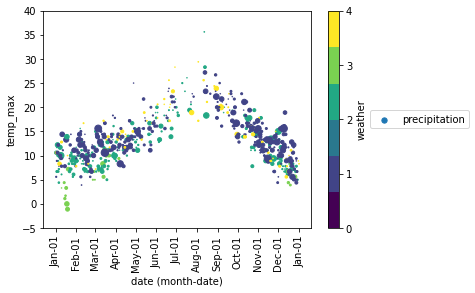

<Figure size 28800x28800 with 0 Axes>

In [9]:
import matplotlib.dates as mdates

x = month_date
y = weather_data['temp_max']
# generate scatter plot
plt.scatter(x, y, s = weather_data['precipitation'], c = weathers, cmap=plt.cm.get_cmap('viridis', 6),
            label='precipitation')
plt.colorbar(ticks=range(5), label='weather')
# setting the labeling axis
plt.xlabel("date (month-date)")
plt.ylabel("temp_max")
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
# conver the x-axis as month-date format and only showing 1st date of the month
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.DayLocator((1)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# limit the y-axis range
plt.ylim(-5, 40)
plt.figure(figsize=(400,400))

We can create the same Altair plot using Matplotlib as well. But, you can see how we can create the same plot using Altair with much less code! Thus, we see that Altair is much simpler to do the data visualization, as it generates the appropriate labels for x and y-axis and color map for the plots.

## Interactivity of Altair over Matplotlib

Because there are 1461 days from 2012 to 2015, it is difficult for us to gain a much deeper understanding of the data by just merely looking at the scatter plot. However, by adding interactivity to the plot, which is fairly simple using Altair, you can zoom in and out and highlight certain regions of the plot to explore the data. This feature is particularly useful when it comes to very large and complex data.

By adding interactivity, we can answer many questions. The example questions are the following:
 - What is the distribution of weather in July?
 - Where are the sunny days?

First, we can add the histogram of the weather below the scatter plot we have generated. There are two things to note. Notice how the built-in function `count()` is used to count each occurrence of the weather. Again, these built-in functions (similar to `monthdate(date)` in the previous part) make plotting very simple in Altair. You also see how `&` is used to join both the scatter plot and the histogram. This makes displaying two different relevant plots straightforward.

In [10]:
histogram = alt.Chart(weather_data).mark_bar().encode(
    x = 'count():Q',
    y = 'weather:N',
).properties(
    width = 400
)

scatter & histogram

alt.VConcatChart(...)

To enable the viewer to highlight certain regions of the plot, we need to specify the interval by using the `alt.selection_interval()` function. Inside the function, you need to specify the encodings. The statement below allows only the horizontal selection, but you can add `encodings=['x,y']` or `encodings=['y']` to allow the vertical selection.

In [11]:
interval = alt.selection_interval(encodings=['x'])

Then, on the plot, we add another parameter `add_selection`, and add the interval specified above. Play around the plot below by horizontally highlighting the scatter plot.

In [12]:
scatter = alt.Chart(weather_data).mark_circle().encode(
    x = 'monthdate(date):T',
    y = 'temp_max:Q',
    fill = 'weather:N',
    size = 'precipitation:Q'
).add_selection(
    interval
)

scatter

alt.Chart(...)

Now, by combining the scatter plot and the histogram, you will see that highlighting the scatter plot will only focus on the relevant data points inside the interval. Thus, you will see the histogram gets updated while changing the highlighted intervals. We add `transform_filter()` to exclude data out of the highlighted intervals.

In [13]:
histogram = alt.Chart(weather_data).mark_bar().encode(
    x = 'count():Q',
    y = 'weather:N',
).properties(
    width = 400
).transform_filter(
    interval
)

scatter & histogram

alt.VConcatChart(...)

If you play around with the plot above, you can answer the question: 'What is the distribution of weather in July?' You can see that it's mostly sunny and is foggy and rainy at an almost equal rate. Please refer to the image below.

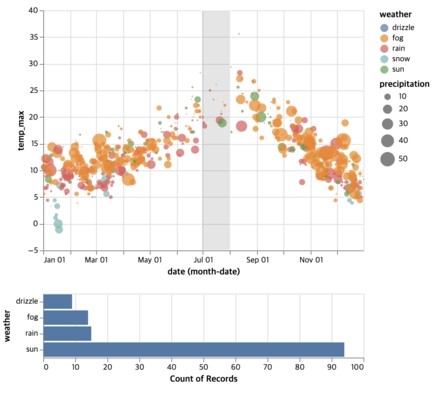

But, how should we modify the plot to answer the second question (Where are the sunny days?)? We can add more interactivity to the histogram so that if someone clicks on the bar plot of each weather, then it only displays the plots for that weather. In other words, if you click the bar for 'Sun', the scatter plot above will only show the circles for the sunny weather. To enable this clicking feature, you use the `selection_multi()` to initialize the click selection element and add this element to `add_selection` to the histogram and `transform_filter` to the scatter plot.

Please note that to un-do the selection onto the histogram or the bar plot, click the grid of the unselected region of the plot, or just re-run the cell below.

In [14]:
interval = alt.selection_interval(encodings = ['x'])
scale = alt.Scale(domain = ['drizzle', 'fog', 'rain', 'snow', 'sun'])
color = alt.Color('weather:N', scale = scale)
click = alt.selection_multi(encodings = ['color'])

scatter = alt.Chart(weather_data).mark_circle().encode(
    x = 'monthdate(date):T',
    y = 'temp_max:Q',
    fill = 'weather:N',
    # modified the scale of the precipitataion, as 0 precipitation doesn't appear
    size = alt.Size('precipitation:Q', scale=alt.Scale(range=[5,200])),
    color = alt.condition(interval, color, alt.value('lightgray'))
).add_selection(
    interval
).transform_filter(
    click
)

histogram = alt.Chart(weather_data).mark_bar().encode(
    x = 'count():Q',
    y = 'weather:N',
    color = alt.condition(click, color, alt.value('lightgray'))
).properties(
    width = 400
).transform_filter(
    interval
).add_selection(
    click
)

scatter & histogram

alt.VConcatChart(...)

But, what about adding interactivity in Matplotlib? Let's add a simple interval selection interactivity to the scatter plot using Matplotlib. Excluding the original scatter plot generation, you see that even adding a simple interval section requires much more and longer code. For example, you need to import `SpanSelector()` to select an area of the plot and define the additional `onselect()` function to store the x and y-coordinate data of the mouse clicks to draw the selected area. 

From the example below, you saw how easy it is for you to add interactiveness to the plot just by a few, short lines of code in Altair! Play around with the Matplotlib plot below, you'll see that the interval region shown in the red rectangle is generated.

<IPython.core.display.Javascript object>


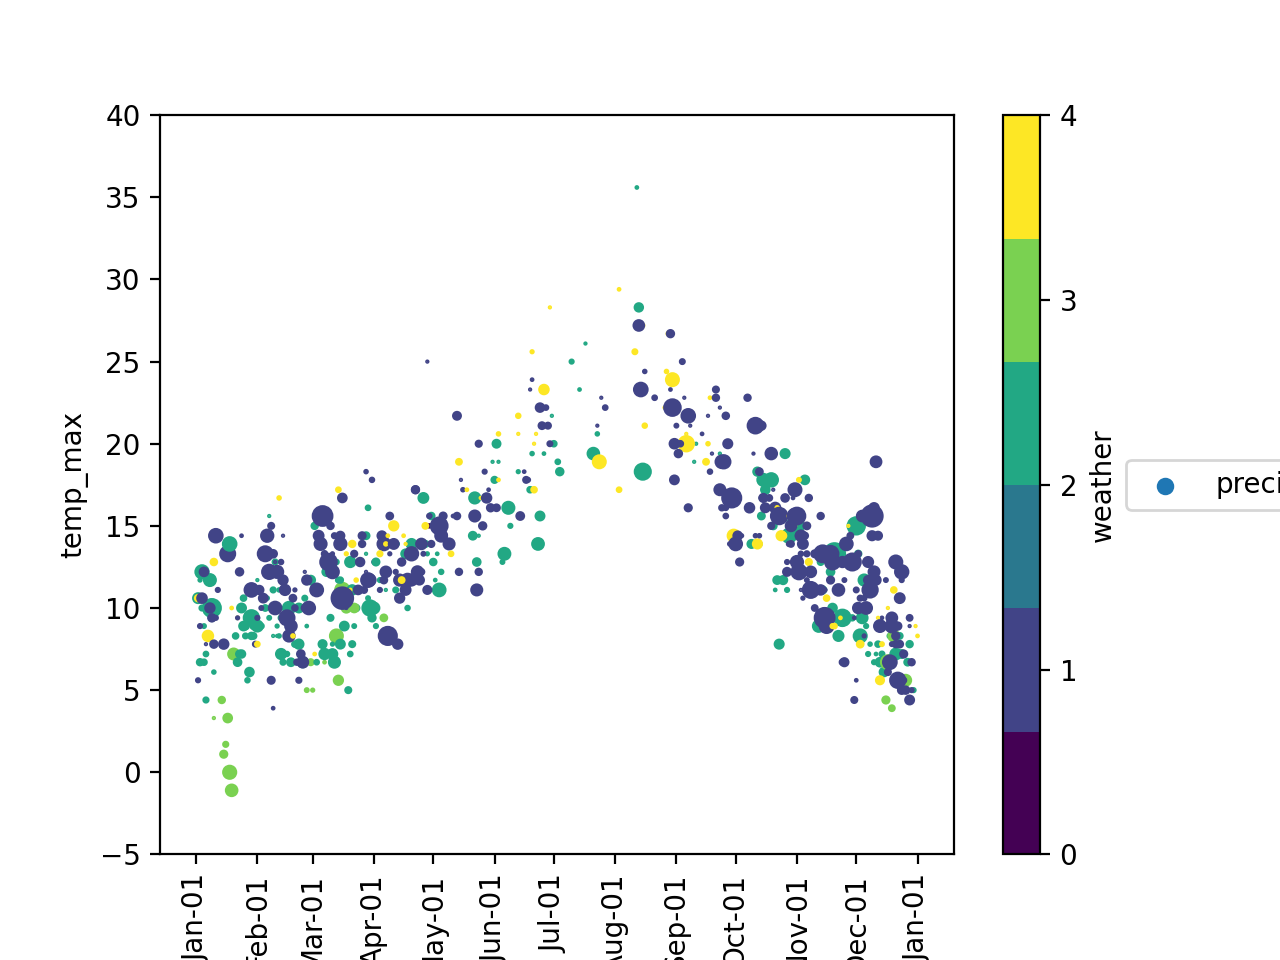

In [15]:
%matplotlib notebook

from matplotlib.widgets import SpanSelector

# generate the scatter plot from above section
x = month_date
y = weather_data['temp_max']
# generate scatter plot
plt.scatter(x, y, s = weather_data['precipitation'], c = weathers, cmap=plt.cm.get_cmap('viridis', 6),
            label='precipitation')
plt.colorbar(ticks=range(5), label='weather')
# setting the labeling axis
plt.xlabel("date (month-date)")
plt.ylabel("temp_max")
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
# conver the x-axis as month-date format and only showing 1st date of the month
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.DayLocator((1)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# limit the y-axis range
plt.ylim(-5, 40)
ax = plt.gca()

# Referred and adapted the code from https://matplotlib.org/2.0.2/examples/widgets/span_selector.html
def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)
    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    fig.canvas.draw_idle()

span = SpanSelector(ax, onselect, 'horizontal', useblit=True,
                    rectprops=dict(alpha=0.5, facecolor='red'))

plt.show()

## Summary and references

This tutorial highlighted data visualization with Altair and its comparison with Matplotlib. Overall, Altair is a powerful visualization tool, as it requires much less code to create a plot and to add interactivity to the plot. I hope that you have enjoyed following this tutorial and appreciate this powerful visualization library.

Much more details about Altair and other libraries are available from the following links.

1. Altair Documentation: https://altair-viz.github.io/index.html
2. Altair Plot Gallery: https://altair-viz.github.io/gallery/index.html
3. Vega: https://vega.github.io/vega/
4. Vega-Lite: http://vega.github.io/vega-lite/
5. Vega Dataset: https://github.com/altair-viz/vega_datasets
6. Matplotlib: https://matplotlib.org/